# **Import Package**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import missingno as msno

# **Reading the data**

In [2]:
path = 'online_retail_II.xlsx'
sheet1 = pd.read_excel(path, 
                   sheet_name=0
                  )
sheet2 = pd.read_excel(path, 
                       sheet_name=1
                      )
df = pd.concat([sheet1, sheet2], axis=0, ignore_index=True)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
    <h2><strong>Dataset Details:</strong></h2>
    This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.<br>
    Link - <a href="https://archive.ics.uci.edu/dataset/502/online+retail+ii" target="_blank">Online Retail Transaction Data</a>

 
#### **Column Details**
- **`InvoiceNo`:**
    - Invoice number.
    - Nominal.
    - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  
- **`StockCode`:**
    - Product (item) code.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each distinct product.  
- **`Description`:**
    - Product (item) name.
    - Nominal.  
- **`Quantity`:**
    - The quantities of each product (item) per transaction.
    - Numeric.  
- **`InvoiceDate`:**
    - Invoice date and time.
    - Numeric.
    - The day and time when a transaction was generated.
- **`Price`:**
    - Unit price.
    - Numeric.
    - Product price per unit in sterling (Â£).  
- **`CustomerID`:**
    - Customer number.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each customer.  
- **`Country`:**
    - Country name.
    - Nominal.
    - The name of the country where a customer resides.
</div>

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### **Data types of each column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### **Summarization of Data**

In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,NaN,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,NaN,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,NaN
min,NaN,NaN,NaN,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,NaN
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,NaN


### **How many records are there in the dataset?**

In [6]:
print("Number of records in the dataset: ", df.shape[0])

Number of records in the dataset:  1067371


### **Missing Value Analysis**

In [7]:
df.isnull().sum() / df.shape[0] * 100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

<Axes: >

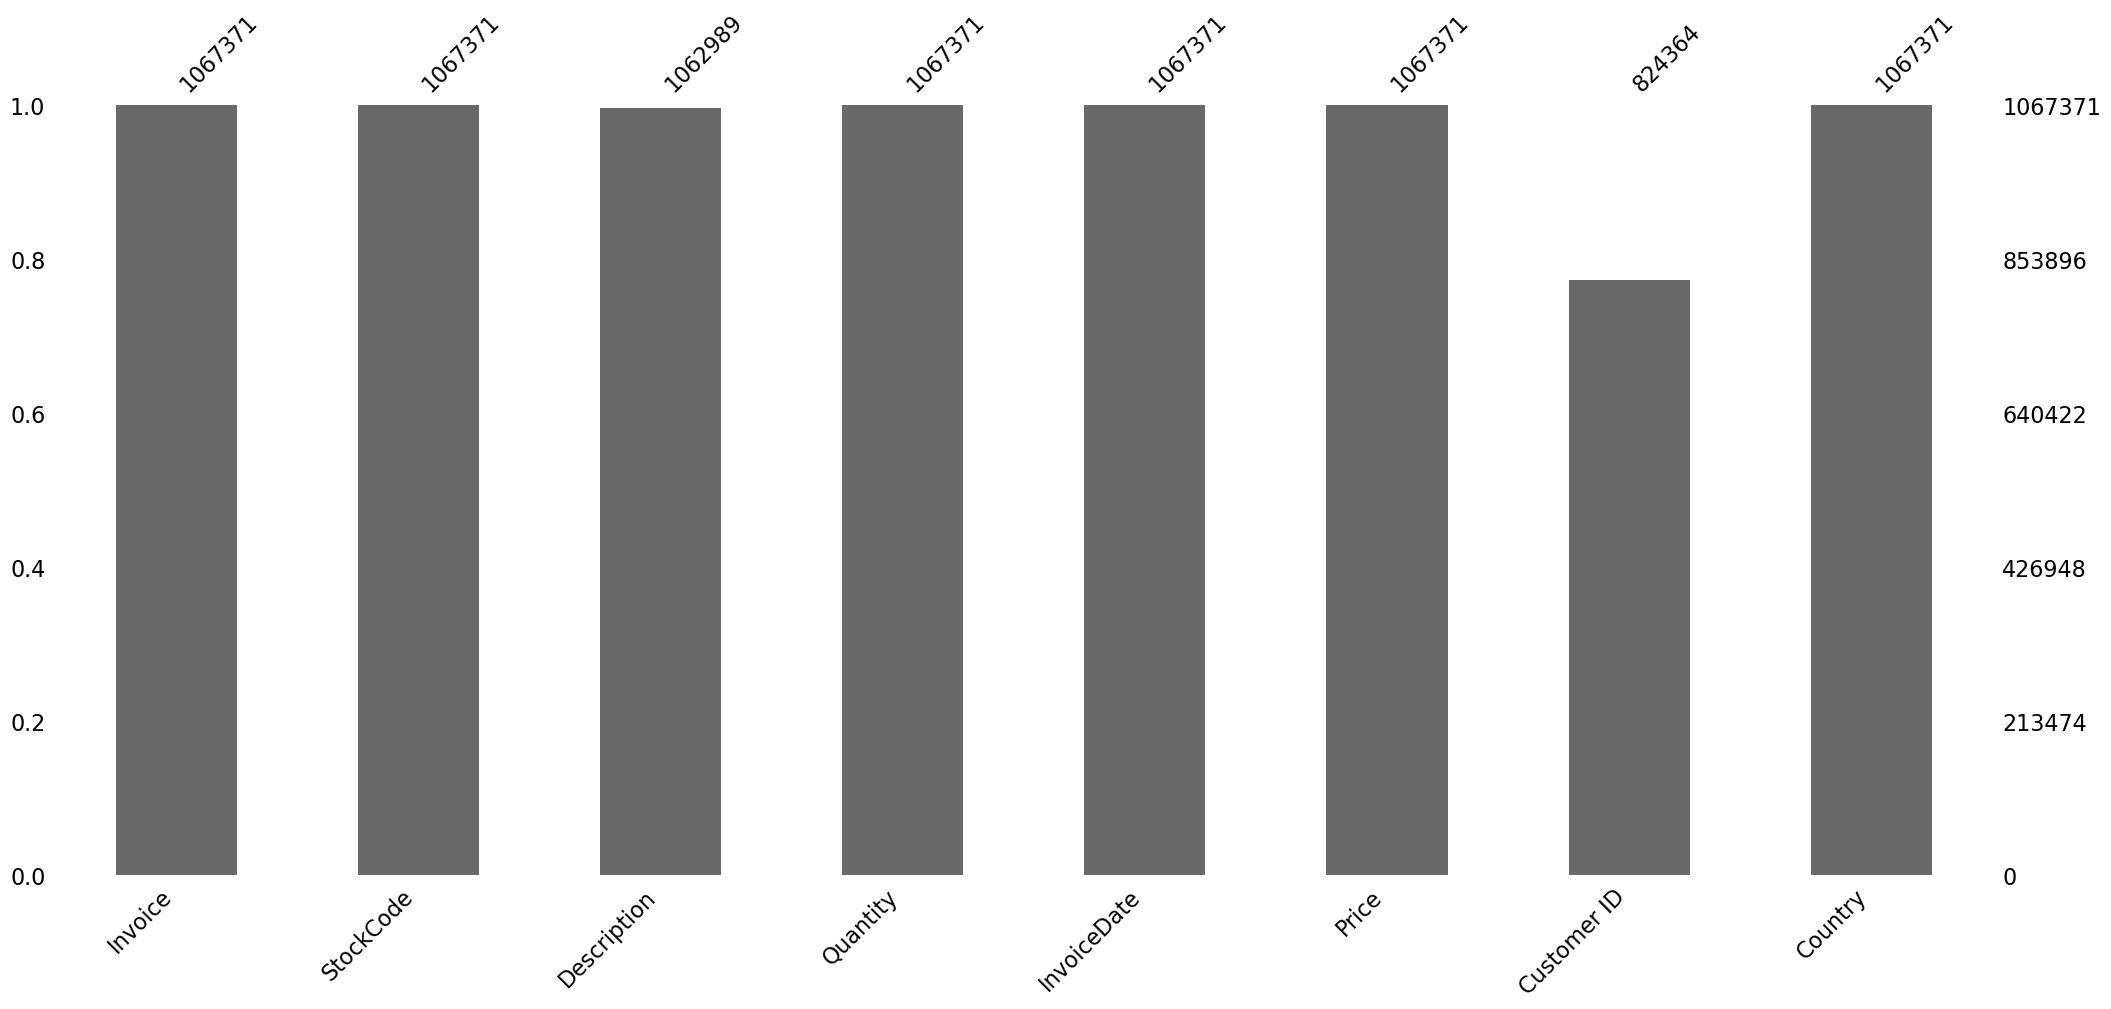

In [8]:
msno.bar(df)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**  
From the above missing value analysis, it is evident that two columns are missing majority of data while other columns has no missing data.

The column names are:
- **`Description (0.411 %)`**
- **`Customer ID (22.767 %)`**
</div>

In [9]:
df[df['Description'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [10]:
print("Number of records with missing Description: ", df[df['Description'].isna()].shape[0])

Number of records with missing Description:  4382


In [11]:
df[df['Description'].isna()]['Price'].value_counts()

Price
0.0    4382
Name: count, dtype: int64

In [12]:
df[df['Description'].isna()]['Customer ID'].value_counts()

Series([], Name: count, dtype: int64)

In [13]:
quantity_type = df[df['Description'].isna()]['Quantity'].value_counts()
quantity_type = quantity_type.reset_index()
quantity_type['Quantity Type'] = quantity_type['Quantity'].apply(lambda a: 'Less than 0' if a < 0 else 'Otherwise')
quantity_type.groupby('Quantity Type')['count'].sum()

Quantity Type
Less than 0    2689
Otherwise      1693
Name: count, dtype: int64

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**    
There are **4382** rows where the **`Description`** column has missing values.  

Upon further analysis, the **`Price`** column has only **0.0** values for each of the missing value of the **`Description`** column.  
The corresponding **`Customer ID`** is also missing.  
Along with that, the **`Quantity`** column has majority values less than **0**, which does not make any sense.  
  
The data might be either corrupted or recorded wrongly for these entries.  
This data should be dropped so that it does not affect the efficiency of ML models adversely.
</div>

In [14]:
df.dropna(subset=['Description'], inplace=True)

In [15]:
df.shape

(1062989, 8)

In [16]:
df[df['Customer ID'].isna()].shape[0]

238625

In [17]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0)].shape[0]

768

In [18]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0)].shape[0]

981

In [19]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0)].shape[0]

749

In [20]:
df[(df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0)].shape[0]

5

In [21]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] > 0)].shape[0]

236122

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**
- There are **238625** missing values in the **`Customer ID`** column.
- There are multiple records in the data where the **`Customer ID`** is missing and the values of other prominant columns like **`Quantity`** and **`Price`** does not make any sense.
    - There are **768** records where **`Price`** is **0.0** but the **`Quantity`** is less than **0**.  
    - There ate **981** records whre **`Price`** is equal to **0.0** but **`Quantity`** is greater than **0**.
    - There are **5** records where the **`Price`** is negative.
    - Finally, there are **749** records where **`Price`** is greater than **0.0** but the **`Quantity`** is less than **0**.
- These ambiguous records which holds no logic needs to be dropped.
- There are **236122** records which are logical but the **`Customer ID`** is missing can be handled by imputing with some common value like **Unknown Customer ID**.

</div>

In [22]:
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0))]

In [23]:
df[df['Customer ID'].isna()].shape[0]

236122

In [24]:
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

In [25]:
df['Customer ID'].head()

0    13085
1    13085
2    13085
3    13085
4    13085
Name: Customer ID, dtype: int64

In [26]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID'] = df['Customer ID'].apply(lambda x: "Unknown Customer ID" if x=='0' else x)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [27]:
df['Customer ID'].value_counts()

Customer ID
Unknown Customer ID    236122
17841                   13097
14911                   11613
12748                    7307
14606                    6709
                        ...  
16663                       1
17752                       1
13942                       1
15913                       1
16994                       1
Name: count, Length: 5943, dtype: int64

In [28]:
df['StockCode'] = df['StockCode'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060486 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1060486 non-null  object        
 1   StockCode    1060486 non-null  category      
 2   Description  1060486 non-null  object        
 3   Quantity     1060486 non-null  int64         
 4   InvoiceDate  1060486 non-null  datetime64[ns]
 5   Price        1060486 non-null  float64       
 6   Customer ID  1060486 non-null  object        
 7   Country      1060486 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 66.9+ MB


In [30]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,Price
count,1.060486e+06,1.060486e+06
mean,1.032382e+01,4.427132e+00
std,1.667588e+02,7.607323e+01
min,-8.099500e+04,0.000000e+00
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [31]:
df[df['Quantity'] < 0]['Price'].value_counts().sort_index(), df[df['Quantity'] < 0]['Price'].value_counts().sort_index().sum()

(Price
 0.01        2
 0.03        5
 0.05        3
 0.06        4
 0.07        5
            ..
 8985.60     1
 10468.80    2
 10953.50    2
 25111.09    1
 38970.00    1
 Name: count, Length: 687, dtype: int64,
 18744)

#### **Separating the Cancelled Orders from All Orders**

In [32]:
df_cancelled = df[(df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False)]
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [33]:
df = df[~((df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False))]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


#### **Total Sales Column Created**

In [34]:
df['Sales'] = df['Price'] * df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [35]:
df = df[~(df['Price'] <= 0)]

In [36]:
df[df['Price'] <= 0].shape[0]

0

In [37]:
df['Description'].nunique()

5399

#### **Dropping Duplicates**

In [38]:
df = df.drop_duplicates()

### **Exploratory Data Analysis**

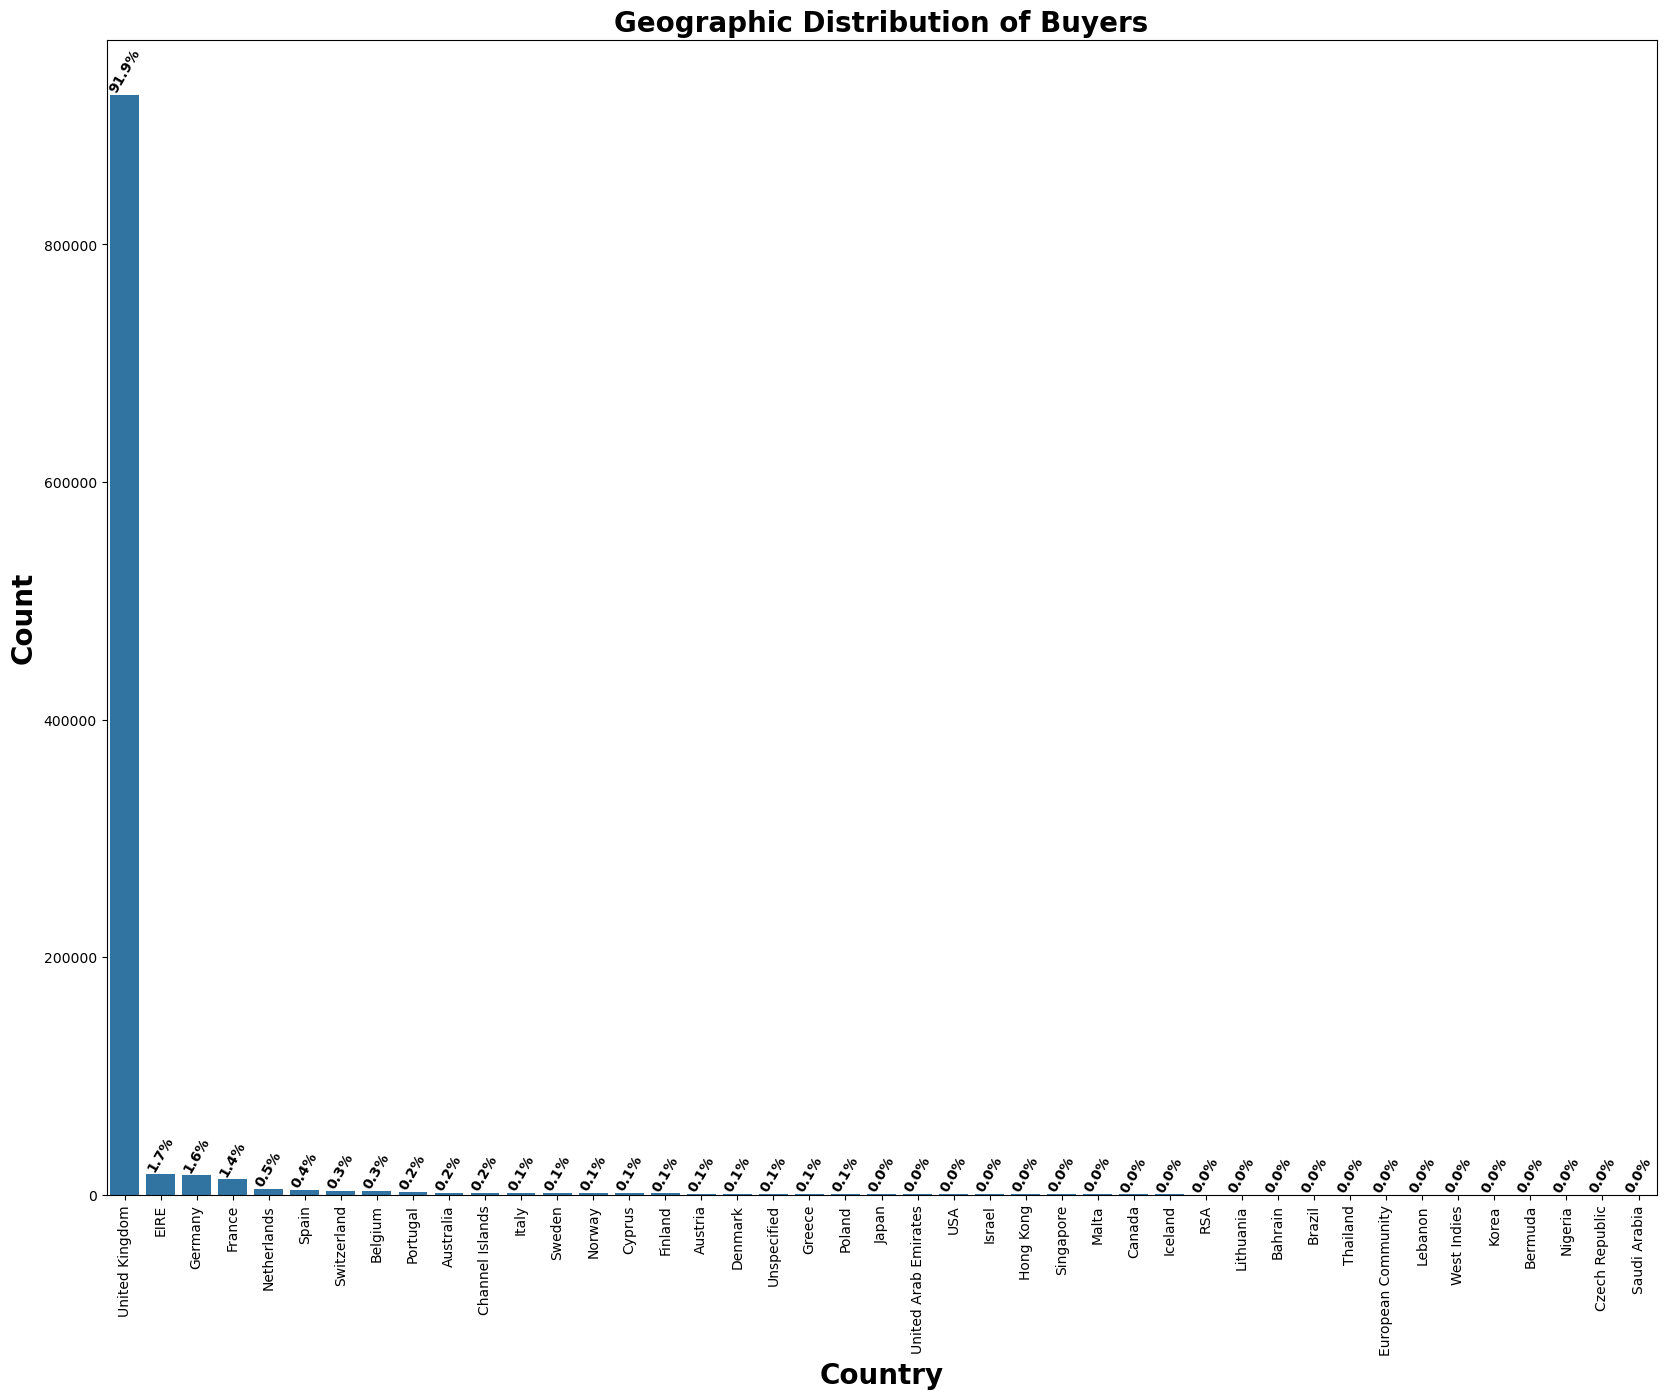

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
country_count = df['Country'].value_counts()
total_count = country_count.sum()
percent = country_count / total_count * 100

# Use Seaborn for visualization
sns.barplot(x=country_count.index, y=country_count.values)

# Annotate bars with percentages
for i, (value, pct) in enumerate(zip(country_count.values, percent)):
    plt.text(i, value, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=60)

plt.xlabel('Country', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Geographic Distribution of Buyers', fontsize=20, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

It is evident that more than 90% of buyers are from United Kingdom. Less than 10% of buyers are from other countries with no country has equal or more than 2% of buyer's share.
</div>

In [41]:
product_pivot = df.pivot_table(index="Description", values="Quantity", aggfunc='sum').reset_index().sort_values(by=['Quantity'], ascending=False)
product_pivot.head(10)

,Description,Quantity
5283,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
5162,WHITE HANGING HEART T-LIGHT HOLDER,94658
3187,"PAPER CRAFT , LITTLE BIRDIE",80995
303,ASSORTED COLOUR BIRD ORNAMENT,80082
2749,MEDIUM CERAMIC TOP STORAGE JAR,78033
2441,JUMBO BAG RED RETROSPOT,77699
769,BROCADE RING PURSE,70369
3123,PACK OF 60 PINK PAISLEY CAKE CASES,56061
160,60 TEATIME FAIRY CAKE CASES,54028
4615,SMALL POPCORN HOLDER,48561


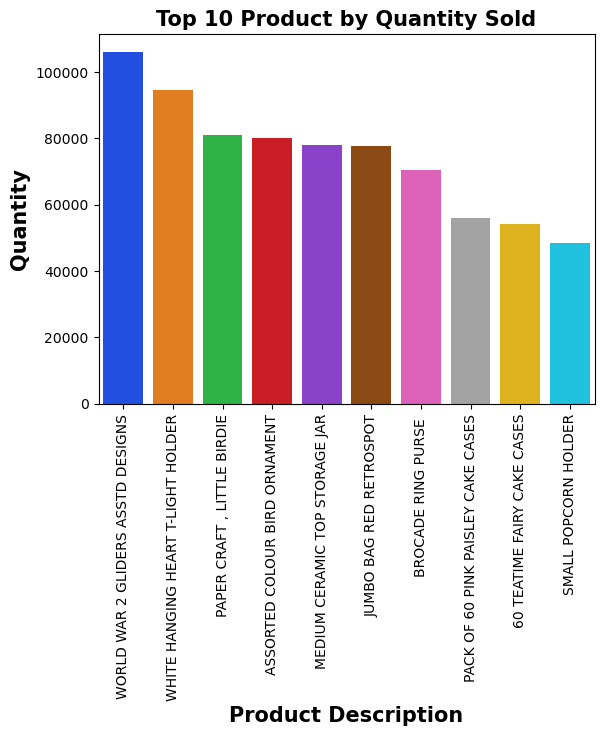

In [42]:
plt.figure(figure=(20, 10))
sns.barplot(data=product_pivot.head(10), x='Description', y='Quantity', hue='Description', palette='bright')
plt.xlabel('Product Description', fontsize=15, fontweight='bold')
plt.ylabel('Quantity', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Top 10 Product by Quantity Sold', fontsize=15, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

The top selling products by the online retail store are --

- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- WHITE HANGING HEART T-LIGHT HOLDER
- PAPER CRAFT , LITTLE BIRDIE
- ASSORTED COLOUR BIRD ORNAMENT
- MEDIUM CERAMIC TOP STORAGE JAR
- JUMBO BAG RED RETROSPOT
- BROCADE RING PURSE
- PACK OF 60 PINK PAISLEY CAKE CASES
- 60 TEATIME FAIRY CAKE CASES
- SMALL POPCORN HOLDER

</div>

In [43]:
top_customer = df.groupby(['Customer ID', 'Country'])[['Sales']].sum().sort_values(by='Sales',ascending=False).reset_index()
top_customer = top_customer[~(top_customer['Customer ID'] == 'Unknown Customer ID')]
top_customer.head(10)

,Customer ID,Country,Sales
1,18102,United Kingdom,580987.04
2,14646,Netherlands,528602.52
3,14156,EIRE,313437.62
4,14911,EIRE,291420.81
5,17450,United Kingdom,244784.25
6,13694,United Kingdom,195640.69
7,17511,United Kingdom,172132.87
8,16446,United Kingdom,168472.50
9,16684,United Kingdom,147142.77
10,12415,Australia,144458.37


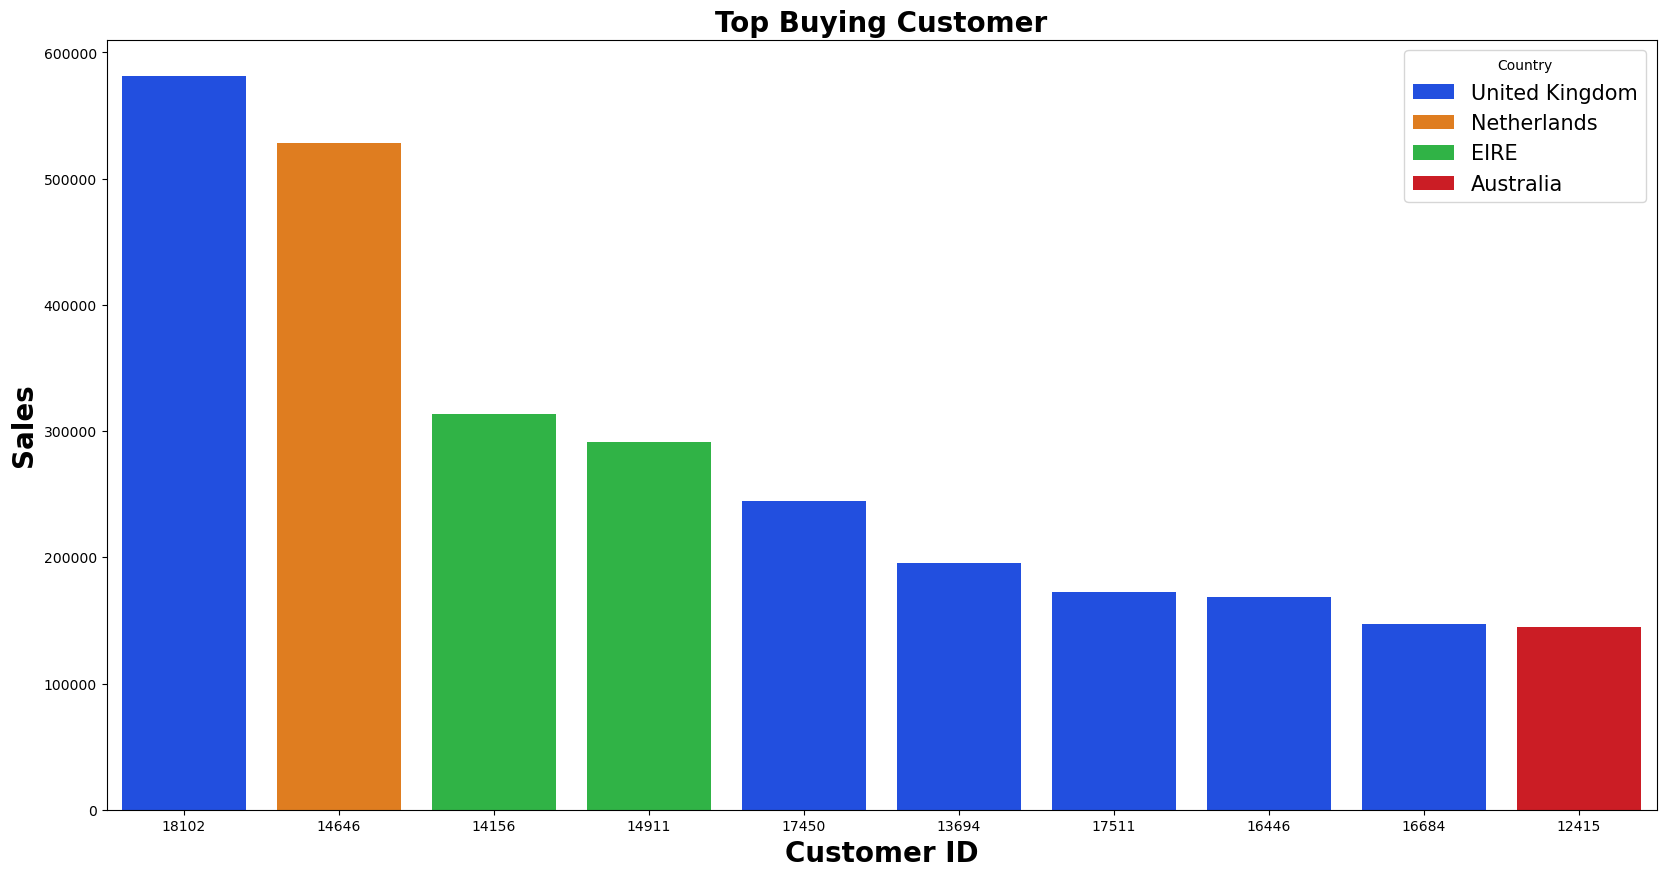

In [44]:
plt.figure(figsize=(20, 10))
sns.barplot(data=top_customer.head(10), x='Customer ID', y='Sales', hue='Country', palette='bright')
plt.xlabel('Customer ID', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Top Buying Customer', fontsize=20, fontweight='bold')
plt.legend(title='Country', fontsize=15)
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the top 10 buying customer are in United Kingdom. Other countries include Netherlands, EIRE (Ireland) and Australia. These shows the online retail store has some good international buyers.

In [45]:
df1 = df.copy()
df1['Month'] = df['InvoiceDate'].dt.strftime('%B')
df1['Day'] = df['InvoiceDate'].dt.strftime('%A')
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,December,Tuesday


In [57]:
sales_by_month = df1.groupby('Month')[['Sales']].sum().reset_index()
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

sales_by_month['Month'] = pd.Categorical(sales_by_month['Month'], categories=month_order, ordered=True)
sales_by_month.sort_values('Month')

,Month,Sales
4,January,1340966.722
3,February,1074050.286
7,March,1547130.521
0,April,1215843.743
8,May,1427002.110
6,June,1510084.320
5,July,1366886.391
1,August,1453093.290
11,September,1978132.183
10,October,2313165.950


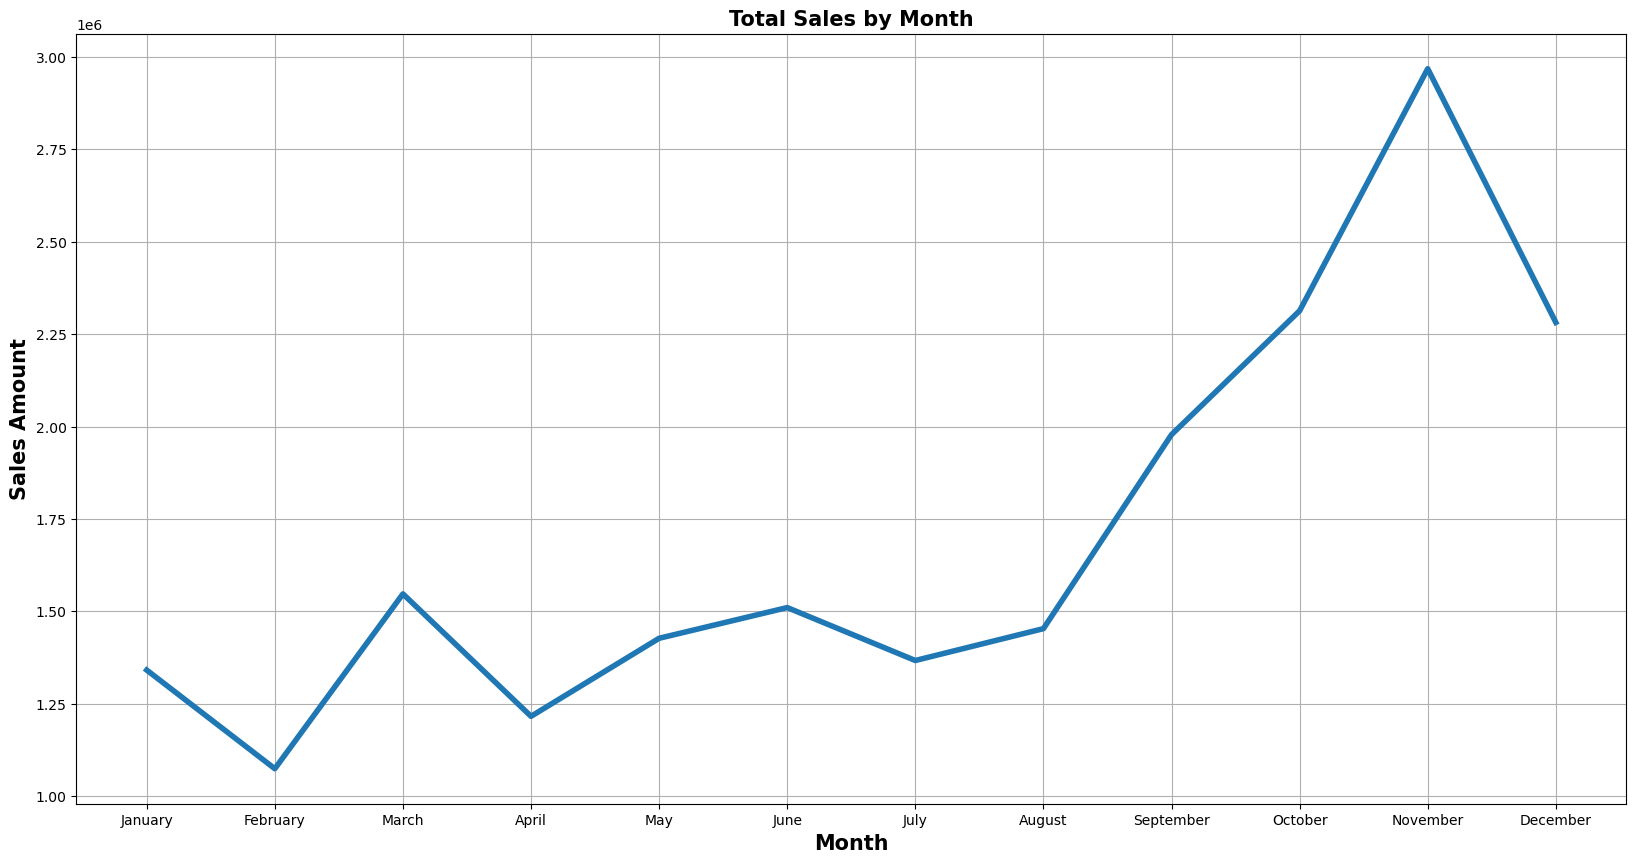

In [58]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_month.sort_values('Month'), x='Month', y='Sales', linewidth=4)
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Month', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happens during the second half of the year with most sales happening in the month of November. Most of the festivites are celebrated towards the end of the year. As a result the sales of products happen during this time. 

Low sales are primarily in the month of February and April.

In [62]:
sales_by_day = df1.groupby('Day')[['Sales']].sum().reset_index()
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
sales_by_day['Day'] = pd.Categorical(sales_by_day['Day'], categories=day_order, ordered=True)
sales_by_day.sort_values('Day')

,Day,Sales
1,Monday,3581594.176
5,Tuesday,4078149.962
6,Wednesday,3488444.333
4,Thursday,4195212.762
0,Friday,3323908.883
2,Saturday,9803.050
3,Sunday,1799147.282


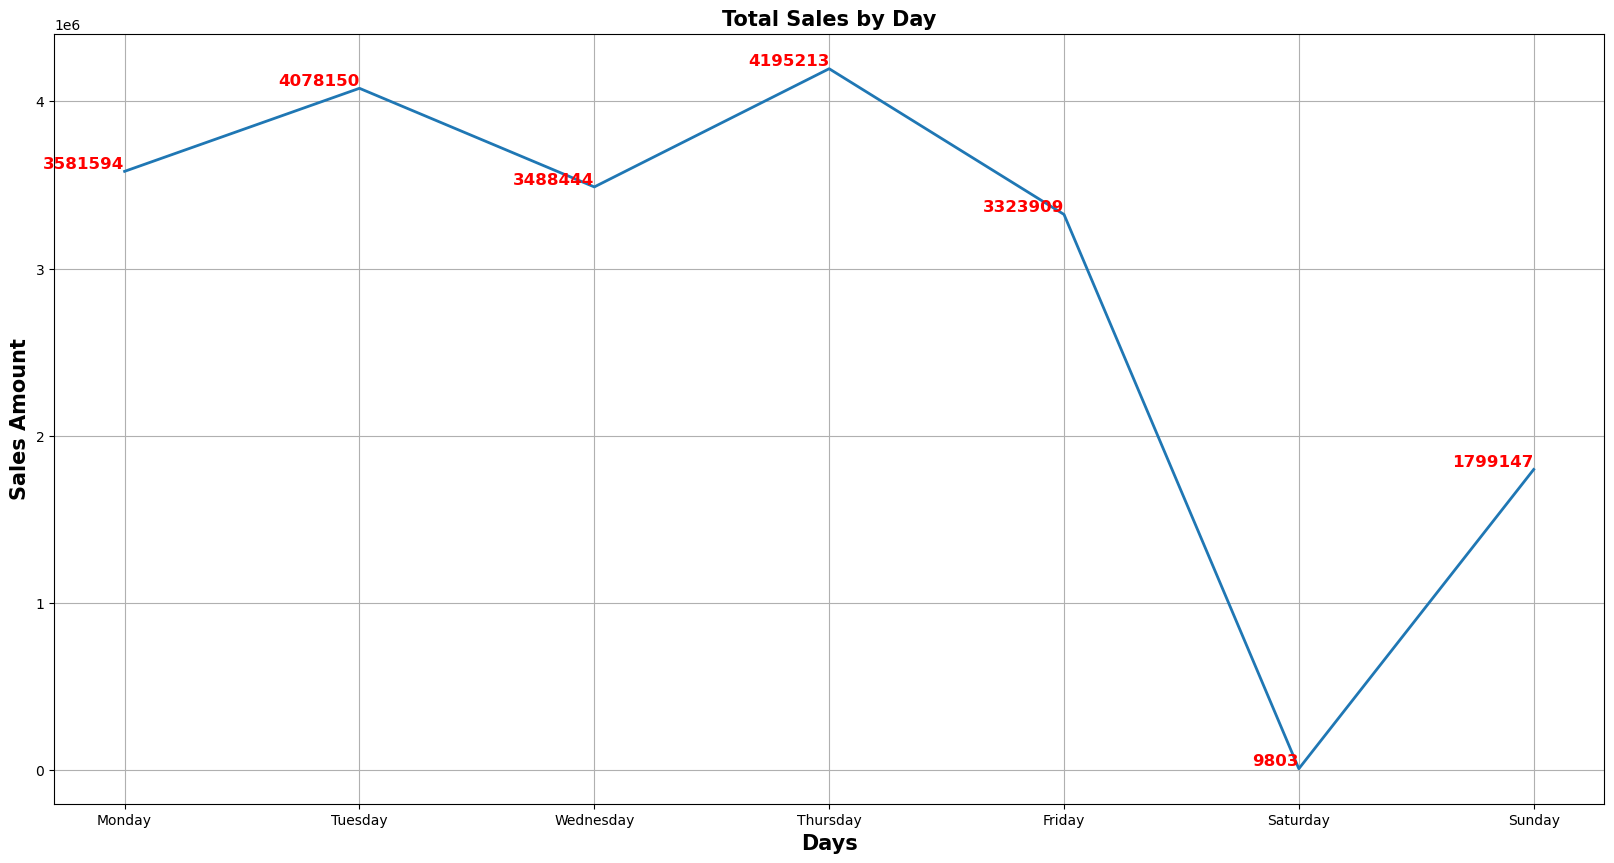

In [216]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_day.sort_values('Day'), x='Day', y='Sales', linewidth=2)
for x, y in zip(sales_by_day["Day"], sales_by_day["Sales"]):
    plt.text(x, y, f"{y:.0f}", fontsize=12, ha="right", va="bottom", fontweight="bold", color="red")
plt.xlabel('Days', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Day', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happen during the weekdays. During weekends sales are quite low.

</div>

In [65]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


## United Kingdom

In [129]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.shape

(926038, 9)

In [130]:
df_uk_prices = df_uk.groupby('InvoiceDate')[['Sales']].sum()
df_uk_prices.head()

,Sales
InvoiceDate,
2009-12-01 07:45:00,505.30
2009-12-01 07:46:00,145.80
2009-12-01 09:06:00,630.33
2009-12-01 09:08:00,310.75
2009-12-01 09:24:00,2286.24


### Daily Revenue Generated By UK Buyers

In [170]:
df_uk_prices_daily = df_uk_prices.resample('D').sum()
df_uk_prices_daily.head()

,Sales
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36


### Weekly Revenue Generated By UK Buyers

In [131]:
df_uk_prices_weekly = df_uk_prices.resample('W').sum()
df_uk_prices_weekly.head().sort_index()

,Sales
InvoiceDate,
2009-12-06,246387.06
2009-12-13,226847.75
2009-12-20,232743.33
2009-12-27,41419.15
2010-01-03,0.00


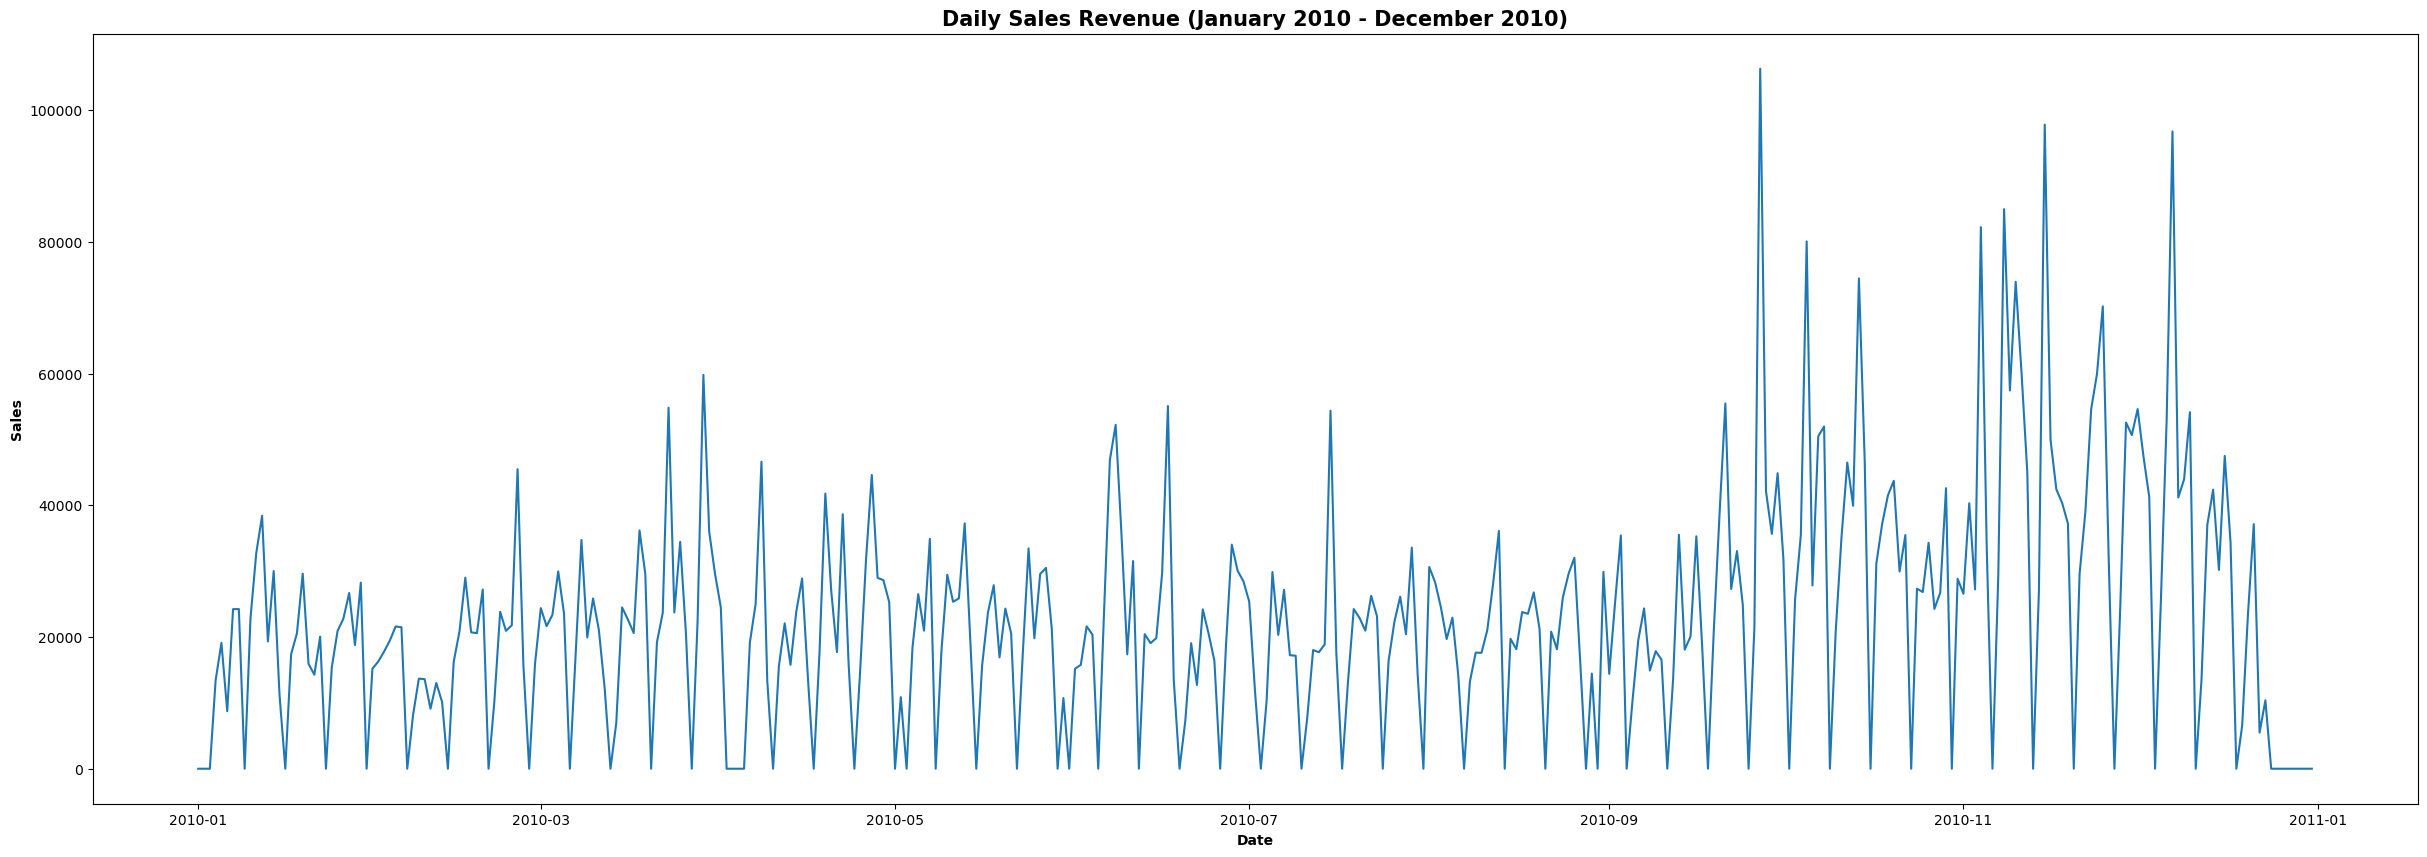

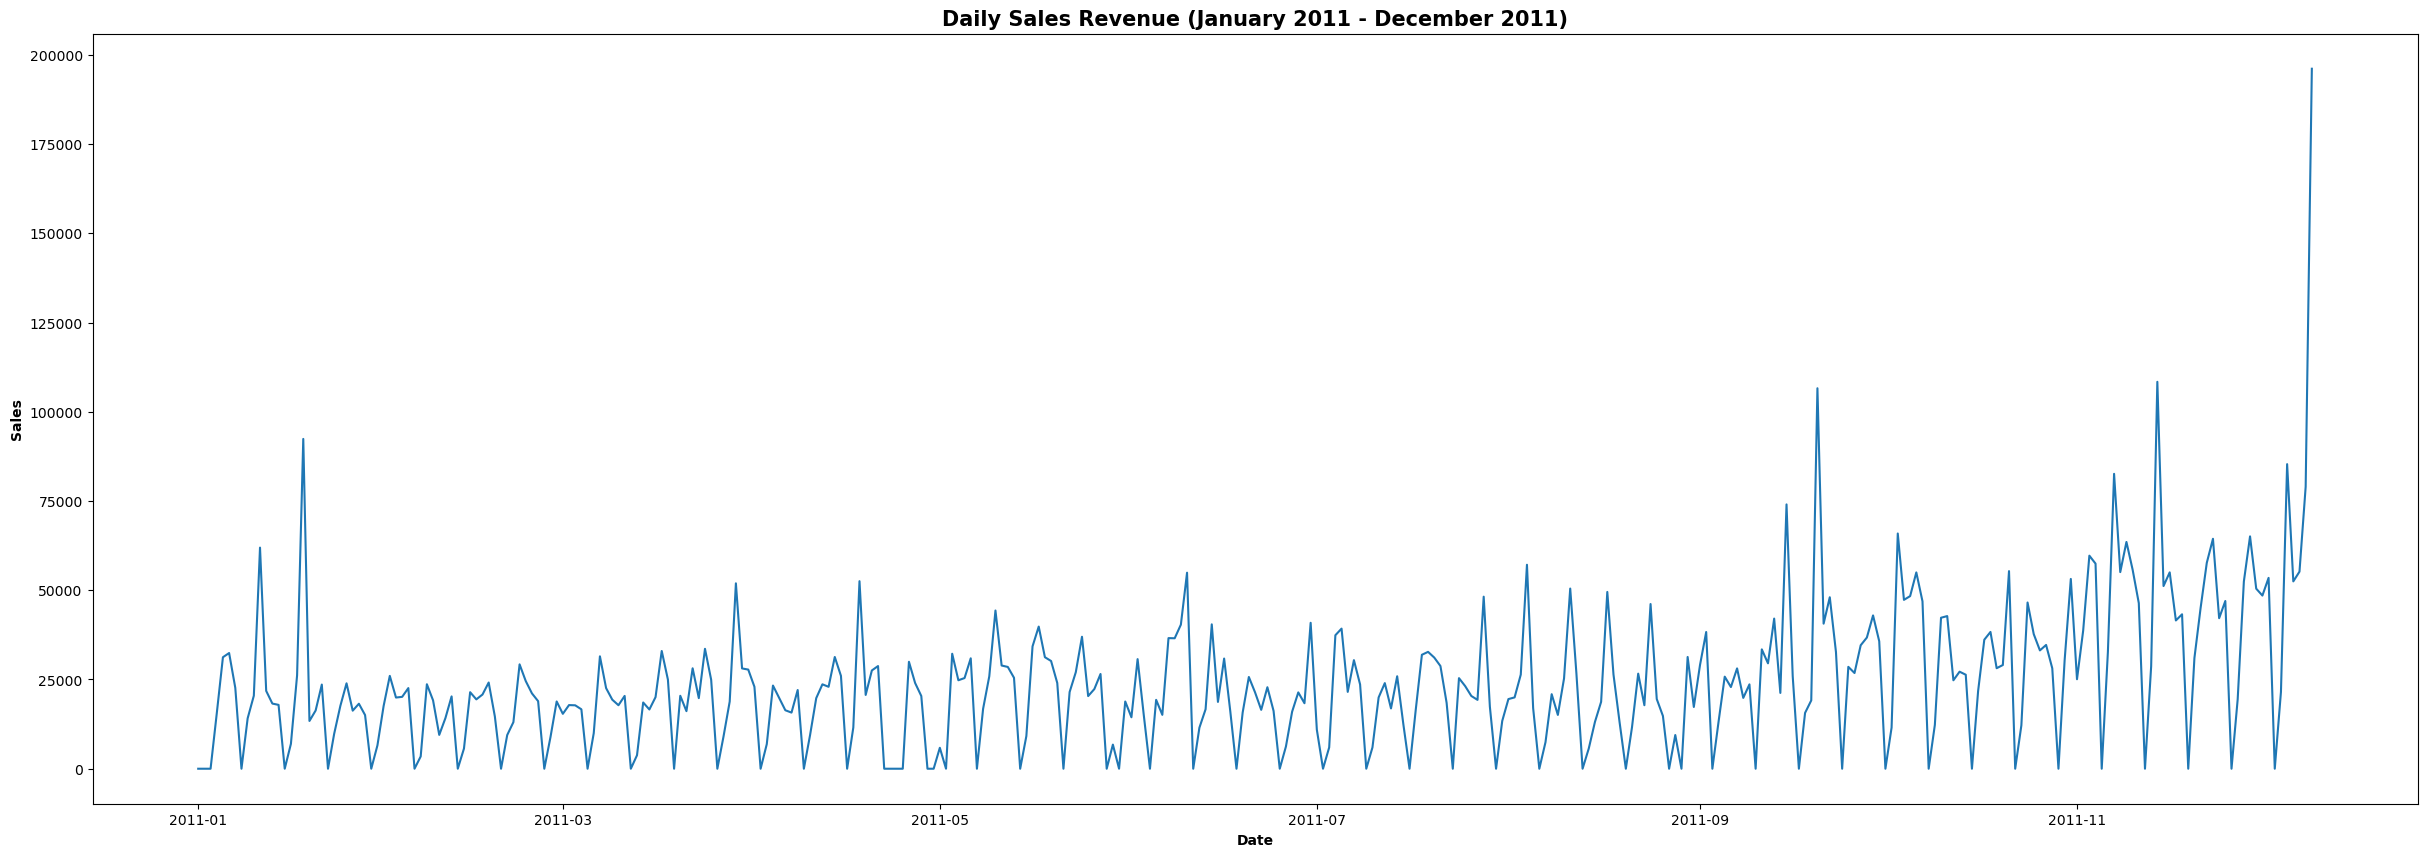

In [186]:
plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'])
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Daily Sales Revenue (January 2010 - December 2010)', fontsize=15, fontweight='bold')
plt.show()


plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'])
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Daily Sales Revenue (January 2011 - December 2011)', fontsize=15, fontweight='bold')
plt.show()


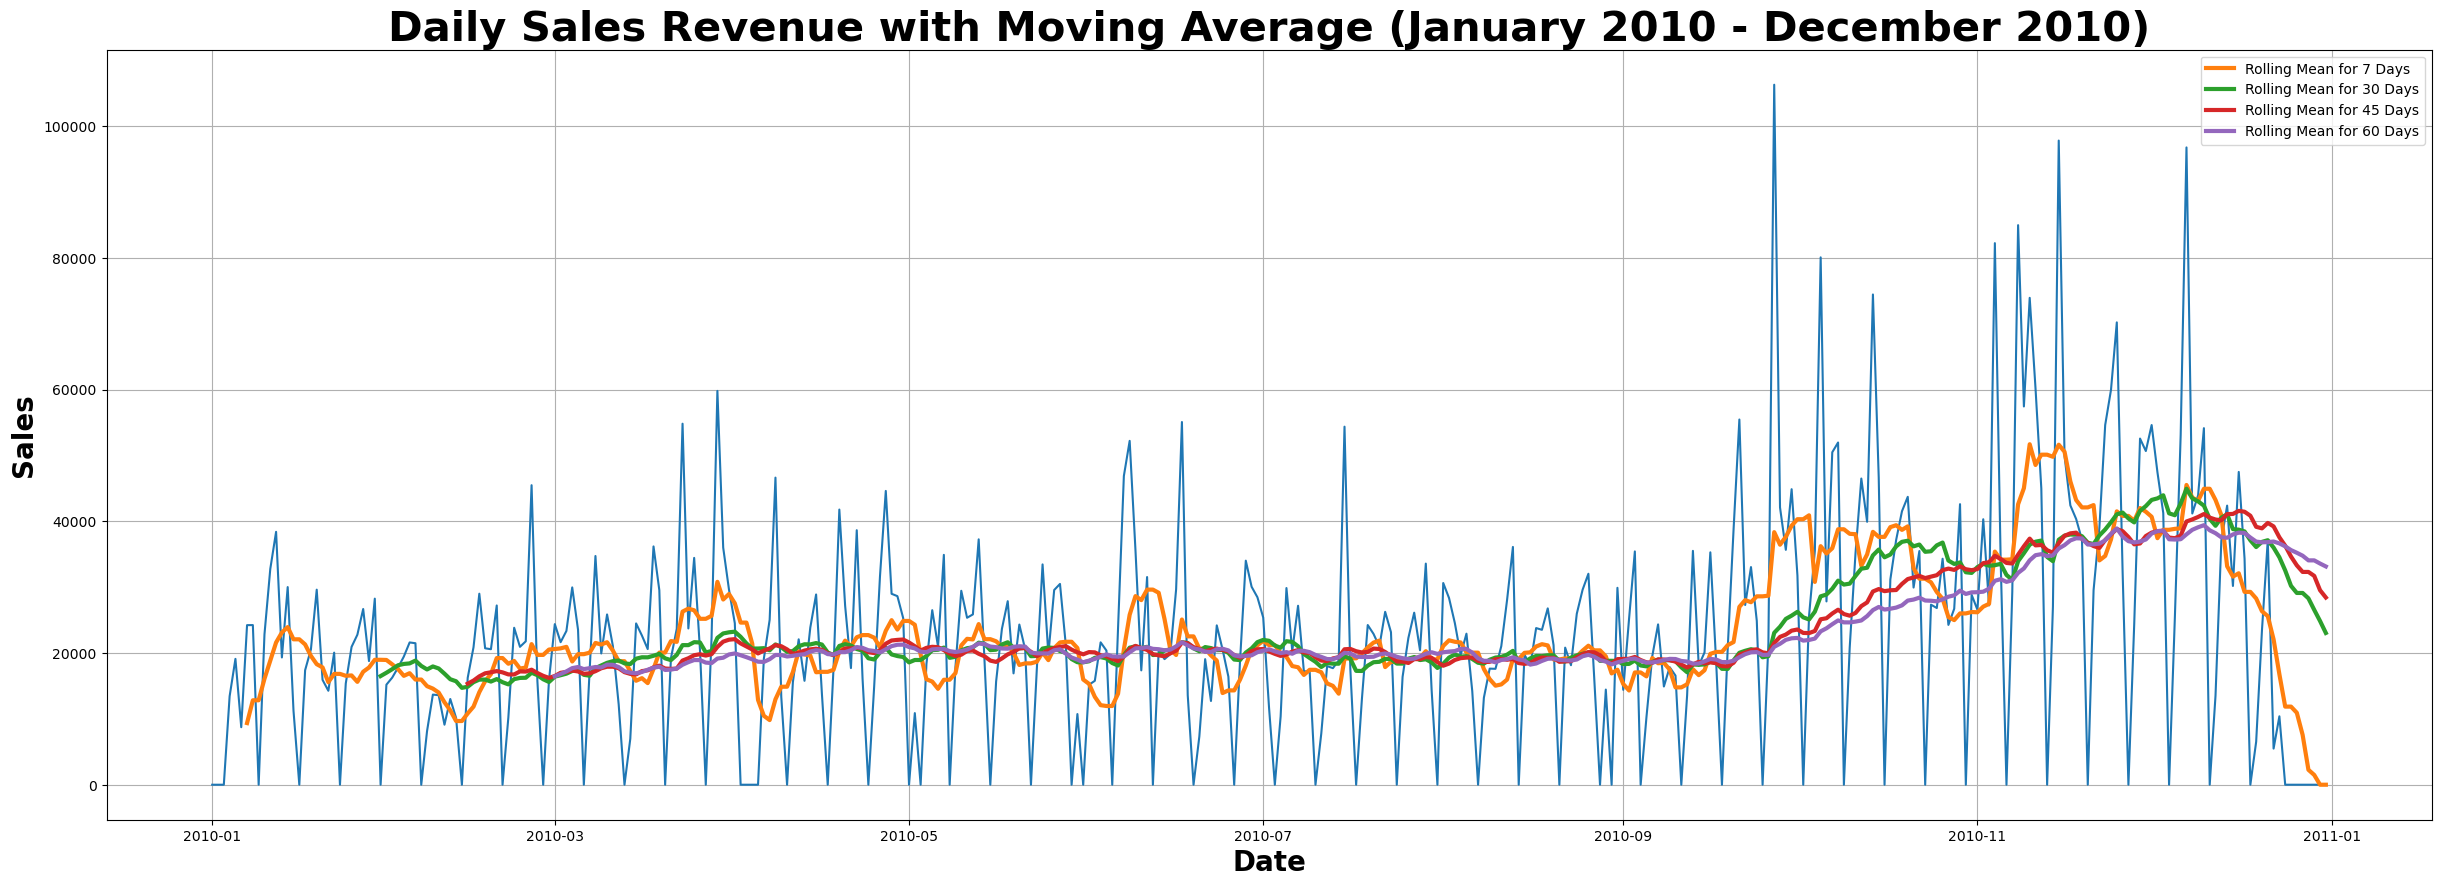

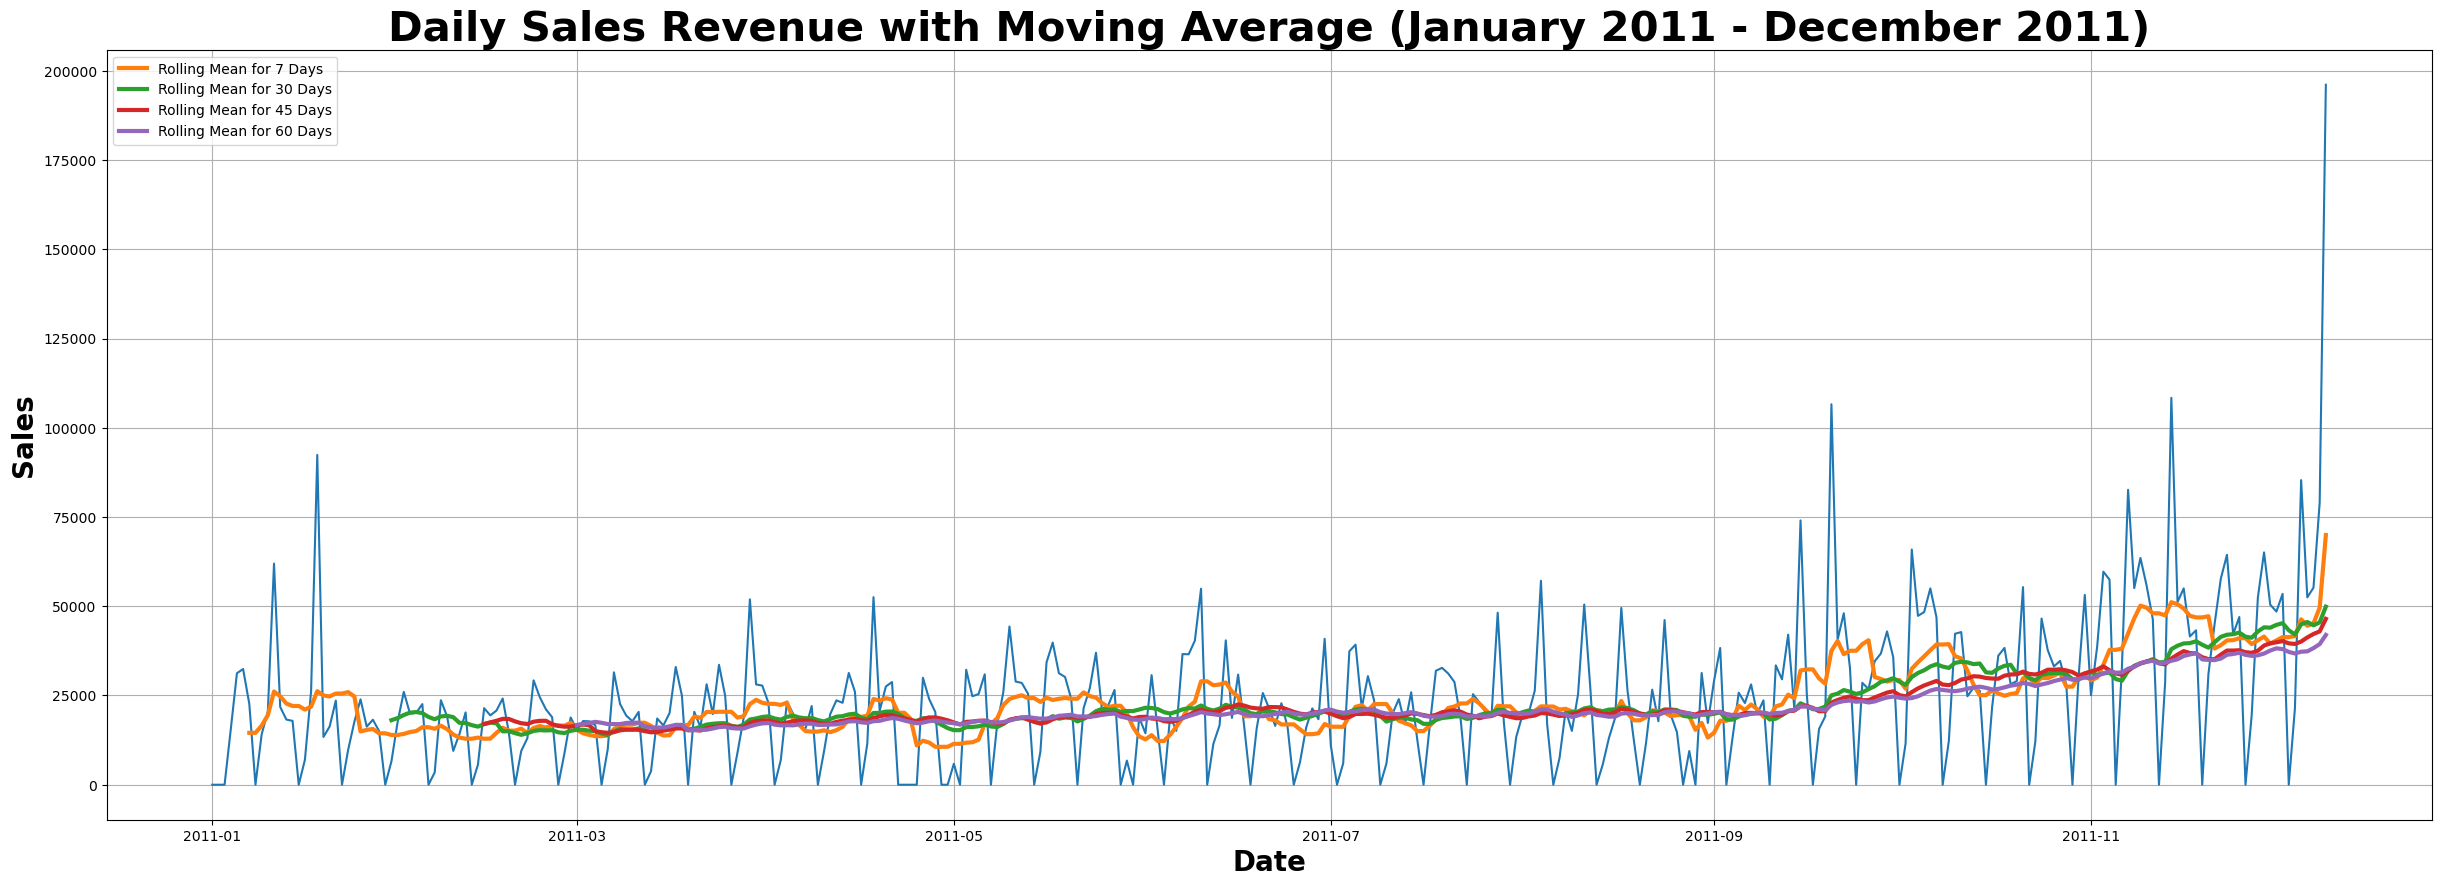

In [197]:
plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'])
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'].rolling(7).mean(), label = "Rolling Mean for 7 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'].rolling(30).mean(), label = "Rolling Mean for 30 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'].rolling(45).mean(), label = "Rolling Mean for 45 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2010-01-01':'2010-12-31'].index, df_uk_prices_daily.loc['2010-01-01':'2010-12-31']['Sales'].rolling(60).mean(), label = "Rolling Mean for 60 Days", linewidth=3)
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Daily Sales Revenue with Moving Average (January 2010 - December 2010)', fontsize=30, fontweight='bold')
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'])
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'].rolling(7).mean(), label = "Rolling Mean for 7 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'].rolling(30).mean(), label = "Rolling Mean for 30 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'].rolling(45).mean(), label = "Rolling Mean for 45 Days", linewidth=3)
plt.plot(df_uk_prices_daily.loc['2011-01-01':'2011-12-31'].index, df_uk_prices_daily.loc['2011-01-01':'2011-12-31']['Sales'].rolling(60).mean(), label = "Rolling Mean for 60 Days", linewidth=3)
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Daily Sales Revenue with Moving Average (January 2011 - December 2011)', fontsize=30, fontweight='bold')
plt.grid()
plt.legend()
plt.show()

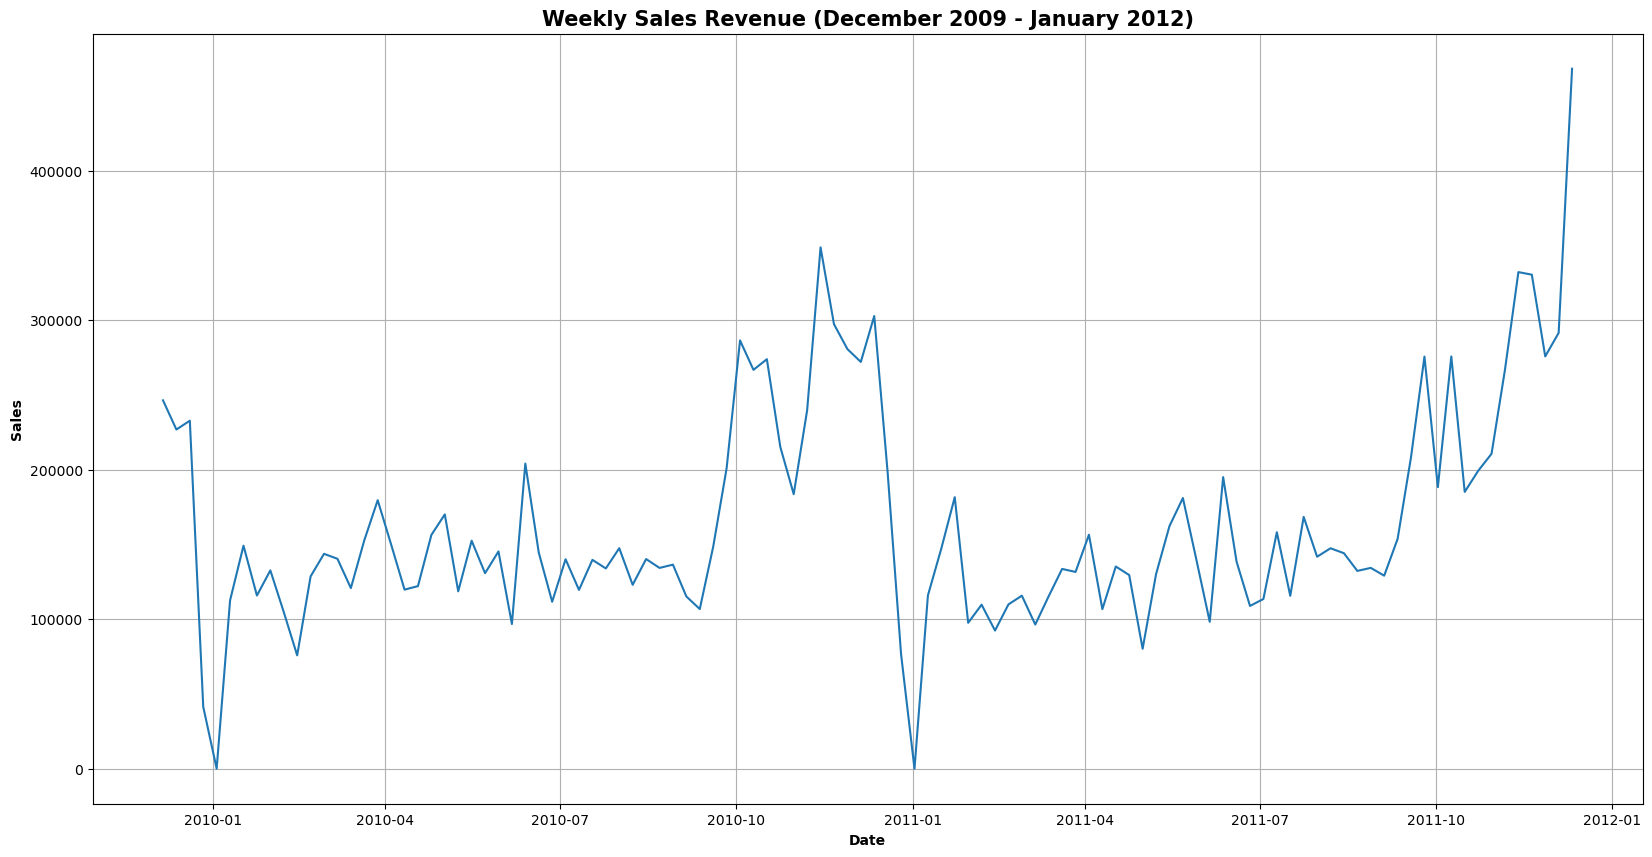

In [195]:
plt.figure(figsize=(20, 10))
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'])
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Weekly Sales Revenue (December 2009 - January 2012)', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

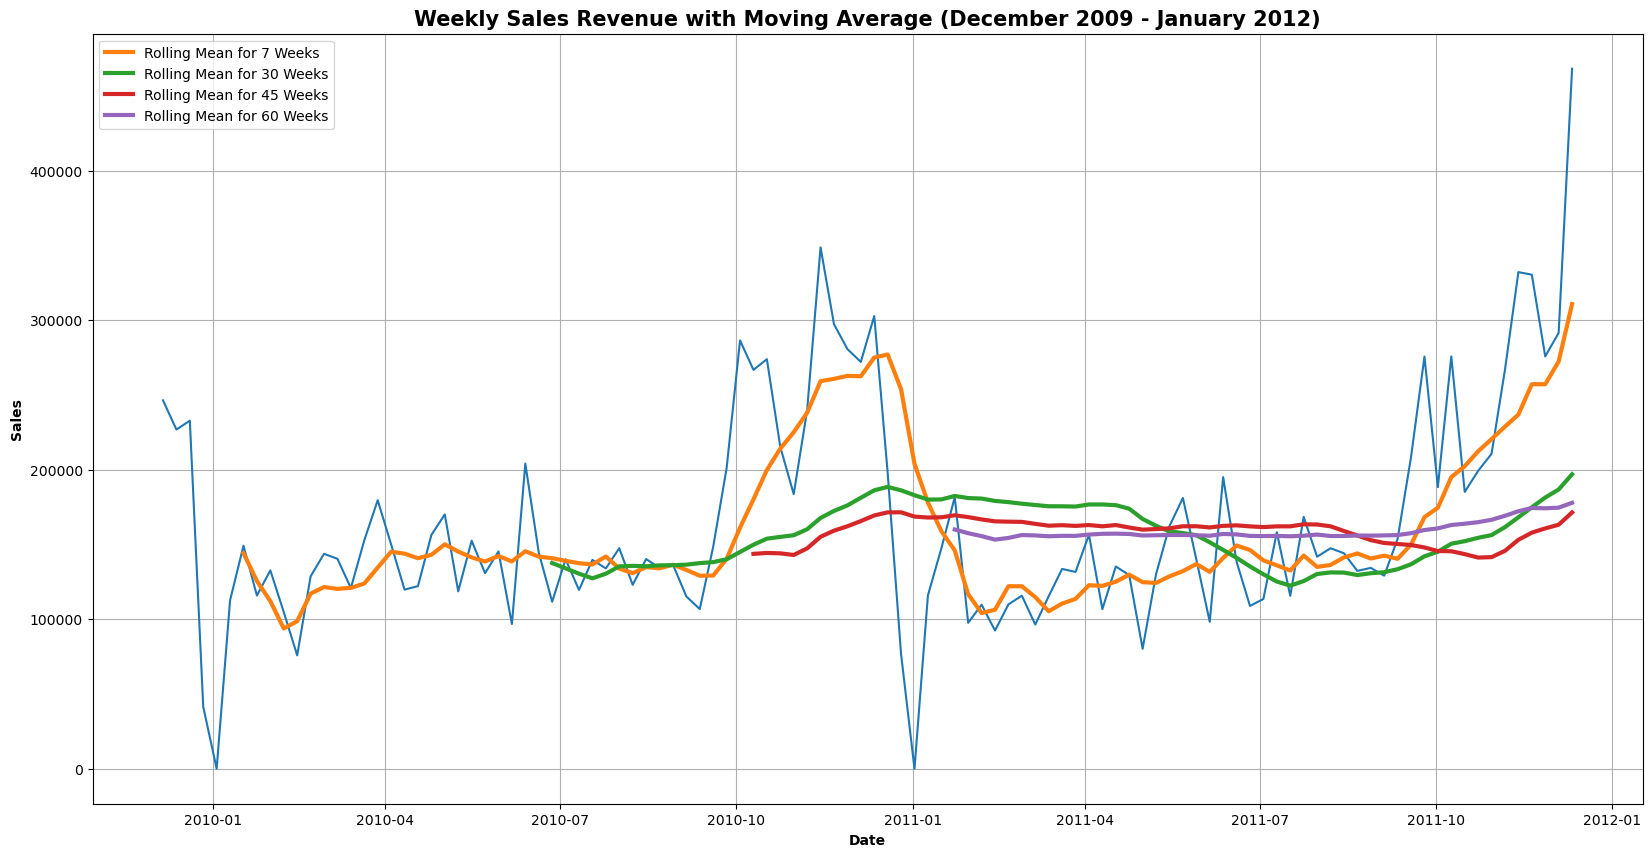

In [194]:
plt.figure(figsize=(20, 10))
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'])
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(7).mean(), label = "Rolling Mean for 7 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(30).mean(), label = "Rolling Mean for 30 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(45).mean(), label = "Rolling Mean for 45 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(60).mean(), label = "Rolling Mean for 60 Weeks", linewidth=3)
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Weekly Sales Revenue with Moving Average (December 2009 - January 2012)', fontsize=15, fontweight='bold')
plt.grid()
plt.legend()
plt.show()

In [241]:
#Store the results
rmse = []
train_prophet = train.rename(columns={"InvoiceDate": "ds", "Sales": "y"})
#Loop
m = None
for params in grid:
  #model
  m = Prophet(seasonality_mode = params['seasonality_mode'],
              seasonality_prior_scale = params['seasonality_prior_scale'],
              changepoint_prior_scale = params['changepoint_prior_scale'])
  m.fit(train_prophet)

  df_cv = cross_validation(m,
                          horizon = '31 days',
                          period = '16 days',
                          initial = '365 days',
                          parallel = 'processes')

  #Measure the error and store the result
  error = performance_metrics(df_cv)["rmse"].mean()
  print(error)
  rmse.append(error)

12:51:00 - cmdstanpy - INFO - Chain [1] start processing
12:51:00 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] start processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1] done processing
12:51:02 - cmdstanpy - INFO - Chain [1]

13954.214015963056


12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] start processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:05 - cmdstanpy - INFO - Chain [1] done processing
12:51:06 - cmdstanpy - INFO - Chain [1] start processing
12:51:06 - cmdstanpy - INFO - Chain [1] done processing
12:51:06 - cmdstanpy - INFO - Chain [1] done processing
12:51:06 - cmdstanpy - INFO - Chain [1]

14070.267844163076


12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] done processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1] start processing
12:51:09 - cmdstanpy - INFO - Chain [1

13945.037469005356


12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] done processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
12:51:12 - cmdstanpy - INFO - Chain [

13866.610257584629


12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] done processing
12:51:15 - cmdstanpy - INFO - Chain [1] start processing
12:51:15 - cmdstanpy - INFO - Chain [1

15687.96235780869


12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [1] done processing
12:51:19 - cmdstanpy - INFO - Chain [1] start processing
12:51:19 - cmdstanpy - INFO - Chain [

16044.03309472434


12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] done processing
12:51:22 - cmdstanpy - INFO - Chain [1] start processing
12:51:22 - cmdstanpy - INFO - Chain [1]

16060.992286144718


12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1] done processing
12:51:24 - cmdstanpy - INFO - Chain [1] start processing
12:51:24 - cmdstanpy - INFO - Chain [1

15947.080880459267


12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] done processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [1] start processing
12:51:28 - cmdstanpy - INFO - Chain [

14633.311631591332


12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing
12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1]

14604.687849104801


12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] done processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [1] start processing
12:51:34 - cmdstanpy - INFO - Chain [

14663.765759108826


12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:37 - cmdstanpy - INFO - Chain [1] done processing
12:51:37 - cmdstanpy - INFO - Chain [1

14660.194666252964


12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1]

15338.671919988052


12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:43 - cmdstanpy - INFO - Chain [1]

15349.197843584943


12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] done processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1] start processing
12:51:47 - cmdstanpy - INFO - Chain [1

15412.054650480737


12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] start processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [1] done processing
12:51:50 - cmdstanpy - INFO - Chain [

15266.167698634128


12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] done processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1] start processing
12:51:54 - cmdstanpy - INFO - Chain [1

16735.452695937423


12:51:56 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] done processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1] start processing
12:51:57 - cmdstanpy - INFO - Chain [1

16753.790353132354


12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1

16715.67969855846


12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing
12:52:03 - cmdstanpy - INFO - Chain [

16773.982939665246


12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:06 - cmdstanpy - INFO - Chain [1

17883.27403768364


12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing
12:52:09 - cmdstanpy - INFO - Chain [1

17947.450497287857


12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing
12:52:12 - cmdstanpy - INFO - Chain [

17988.841542498783


12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] done processing
12:52:15 - cmdstanpy - INFO - Chain [1] start processing
12:52:15 - cmdstanpy - INFO - Chain [1]

17937.74053789688


12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] start processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1] done processing
12:52:18 - cmdstanpy - INFO - Chain [1

17359.559511760606


12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [1] done processing
12:52:21 - cmdstanpy - INFO - Chain [1] start processing
12:52:21 - cmdstanpy - INFO - Chain [

17438.60293076571


12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] done processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1] start processing
12:52:24 - cmdstanpy - INFO - Chain [1

17392.068868151815


12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] done processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1] start processing
12:52:27 - cmdstanpy - INFO - Chain [1

17468.09461693137


12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] start processing
12:52:30 - cmdstanpy - INFO - Chain [1] done processing
12:52:30 - cmdstanpy - INFO - Chain [1

18569.928661552232


12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] start processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1] done processing
12:52:33 - cmdstanpy - INFO - Chain [1

18440.004348857365


12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
12:52:36 - cmdstanpy - INFO - Chain [1

18453.771620694144


12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] start processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1] done processing
12:52:39 - cmdstanpy - INFO - Chain [1]

18595.33381880957


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# train_prophet = train.rename(columns={"InvoiceDate": "ds", "Sales": "y"})

# model = Prophet()
# model.fit(train_prophet)

val_prophet = val[["InvoiceDate"]]
val_prophet = val_prophet.rename(columns={"InvoiceDate":"ds"})

In [225]:
val_prophet.head()

,ds
0,2011-07-15
1,2011-07-16
2,2011-07-17
3,2011-07-18
4,2011-07-19


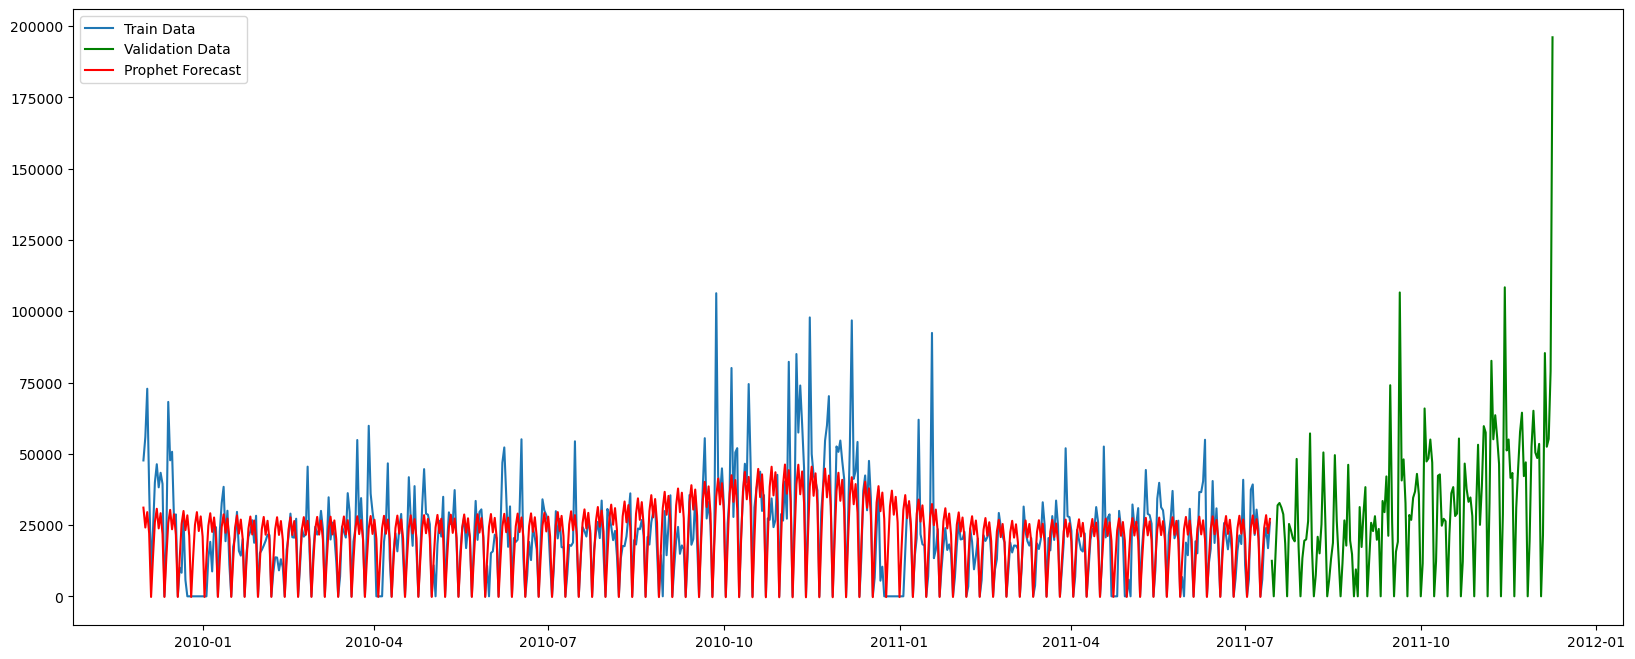

In [244]:
# Predict
forecast = m.predict(train_prophet[['ds']])

plt.figure(figsize=(20, 8))
plt.plot(train["InvoiceDate"], train["Sales"], label="Train Data")
plt.plot(val["InvoiceDate"], val["Sales"], label="Validation Data", color="green")
plt.plot(train["InvoiceDate"], forecast["yhat"], label="Prophet Forecast", color="red")

plt.legend()
plt.show()

In [245]:
def calculate_mape(actual, forecast):
    actual, forecast = np.array(actual), np.array(forecast)
    
    # Avoid division by zero by replacing zeros with a small value
    actual = np.where(actual == 0, 1, actual)
    
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mape


In [246]:
calculate_mape(train_prophet['y'], forecast['yhat'])

123062.80562104523

# LSTM Model for time series

In [247]:
df_uk_prices_daily.head()

,Sales
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36


In [248]:
df_uk_prices_daily_2010 = df_uk_prices_daily.loc['2011-01-01':'2011-12-31']
df_uk_prices_daily_2010.head()

,Sales
InvoiceDate,
2011-01-01,0.00
2011-01-02,0.00
2011-01-03,0.00
2011-01-04,15458.17
2011-01-05,31239.09


In [249]:
df_uk_prices_daily_2010.tail()

,Sales
InvoiceDate,
2011-12-05,85331.87
2011-12-06,52484.19
2011-12-07,55214.81
2011-12-08,78999.51
2011-12-09,196114.48
